<a href="https://colab.research.google.com/github/Sandeshwebdev1999/EDA_python/blob/main/check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name**  -  **Play Store Analysis**

##### **Project Type**    - EDA

##### **Contribution**    - Individual

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
path = '/content/drive/MyDrive/Play Store Data.csv'
df = pd.read_csv(path)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


###**Apps Dataset Columns Descriptions:**




###This file contains all the details of the apps on Play Store. There are some features that describe a given app.

**App** : Name of the app

**Category** : Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.

**Rating** : The current average rating (out of 5) of the app on Play Store

**Reviews** : Number of user reviews given on the app

**Size** : Size of the app in MB (megabytes)

**Installs** : Number of times the app was downloaded from Play Store

**Type** : Whether the app is paid or free

**Price** : Price of the app in US$

**Content Rating** : Who can Rate

**Last Updated** : Date on which the app was last updated on Play Store

**Current Ver** : Current Version on application

In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#### Let's replace the space in the column names:

In [5]:
df.columns = df.columns.str.replace(" ","_")

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

#### Let's look at the number of rows and columns in the dataset.

In [7]:
df.shape

(10841, 13)

####Let me show the types of columns.

In [8]:
df.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content_Rating,object
Genres,object


####Let's have a look at missing data in columns.

In [9]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content_Rating,1
Genres,0


#### There are some missing values and I'm going to use the median value for missing data in the rating column. We know that the median is more robust than the mean for the outlier values.

In [10]:
rating_median = df["Rating"].median()
print(rating_median)
df["Rating"].fillna(rating_median, inplace=True)

4.3


In [11]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content_Rating,1
Genres,0


#### Now we have less than 1% missing values. Let's remove this missing data.

In [12]:
df.dropna(inplace=True)

####Let's take a look at missing data again.

In [13]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content_Rating,0
Genres,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


## ***Data Wrangling***

#### Handling the **Reviews** column

In [15]:
# Convert 'Reviews' column to integers
df['Reviews'] = df['Reviews'].astype(int)

####Handling the **size** column

In [16]:
print(len(df["Size"].unique()))
df["Size"].unique()

457


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

####Let's remove the M and k in the size column.

In [17]:
df["Size"].replace("M","", regex=True, inplace = True)
df["Size"].replace("k","", regex=True, inplace = True)

In [18]:
df["Size"].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '7.0',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201', '3.6', '5.7', '8.6', '2.4', '27',
       '2.7', '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9',
       '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2',
       '2.1', '42', '7.3', '9.1', '55', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '79', '8.4', '118', '44', '695', '1.6',
       '6.2', '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49',
       '77', '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36',

####Let's replace the string "Varies with device" with the median of the size column. To do this, I will first calculate the median of the size.

In [19]:
size_median = df[df["Size"]!="Varies with device"]["Size"].astype(float).median()
size_median

15.0

In [20]:
df["Size"].replace("Varies with device", size_median, inplace=True)

####Let's convert this column into numeric.

In [21]:
df.Size = pd.to_numeric(df.Size)

In [22]:
df.Size.head()

,Size
0,19.0
1,14.0
2,8.7
3,25.0
4,2.8


In [23]:
df.Size.describe().round()

,Size
count,10829.0
mean,34.0
std,91.0
min,1.0
25%,7.0
50%,15.0
75%,28.0
max,1020.0


####Handling the **Installs** and **Price** column

In [24]:
def clean_dataset(dataset):

    # Remove '+' and ',' and convert 'Installs' column to integers
    df['Installs'] = df['Installs'].astype(str)
    df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

    # Remove '$' and convert 'Price' column to float
    df['Price'] = df['Price'].astype(str)
    df['Price'] = df['Price'].str.replace('$', '').astype(float)

    return df

# Clean and transform the dataset, then display the first few rows
cleaned_data_df = clean_dataset(df)
cleaned_data_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
df.Size.describe().round()

,Size
count,10829.0
mean,34.0
std,91.0
min,1.0
25%,7.0
50%,15.0
75%,28.0
max,1020.0


####Handling the genres column


In [26]:
len(df["Genres"].unique())

119

In [27]:
df["Genres"].head(10)

,Genres
0,Art & Design
1,Art & Design;Pretend Play
2,Art & Design
3,Art & Design
4,Art & Design;Creativity
5,Art & Design
6,Art & Design
7,Art & Design
8,Art & Design
9,Art & Design;Creativity


####The data is divided between genre and subgenre, let's only set by genre.

In [28]:
df["Genres"] = df["Genres"].str.split(";").str[0]

In [29]:
len(df["Genres"].unique())

48

In [30]:
df["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [31]:
df["Genres"].value_counts()

,count
Genres,
Tools,841
Entertainment,666
Education,644
Medical,463
Business,460
Productivity,424
Sports,402
Personalization,390
Communication,388


####Let's combine the music & audio with the music.

In [32]:
df["Genres"].replace("Music & Audio", "Music", inplace =True)

In [33]:
df["Genres"].value_counts()

,count
Genres,
Tools,841
Entertainment,666
Education,644
Medical,463
Business,460
Productivity,424
Sports,402
Personalization,390
Communication,388


#### Handling the last updated column

In [34]:
df["Last_Updated"].head()

,Last_Updated
0,"January 7, 2018"
1,"January 15, 2018"
2,"August 1, 2018"
3,"June 8, 2018"
4,"June 20, 2018"


In [35]:
df["Last_Updated"] = pd.to_datetime(df["Last_Updated"])

In [36]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


#### Handling the Current_Ver column

In [37]:
# df['Current_Ver'] = df['Current_Ver'].astype(str)
# df['Current_Ver'] = df['Current_Ver'].str.replace('Varies with device', '').astype(float)
# df["Current_Ver"] = df["Current_Ver"].str.split(".").str[0]


In [38]:
len(df["Current_Ver"].unique())

2831

In [39]:
df["Current_Ver"].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [40]:
df['Current_Ver'] = pd.to_numeric(df['Current_Ver'], errors='coerce')

In [41]:
df['Current_Ver'].dropna(inplace=True)
df = df.dropna(subset=['Current_Ver'])

In [42]:
df["Current_Ver"].unique()

array([1.10000000e+00, 1.00000000e+00, 2.80000000e+00, 3.80000000e+00,
       3.10000000e+00, 4.00000000e+00, 1.50000000e+00, 1.03000000e+00,
       6.00000000e+00, 1.20000000e+00, 2.20000000e+00, 1.60000000e+00,
       2.10000000e+00, 1.30000000e+00, 1.46000000e+00, 1.10000000e+01,
       3.00000000e+00, 2.49300000e+00, 1.70000000e+00, 1.37000000e+00,
       2.90000000e+00, 1.79000000e+00, 8.31000000e+00, 1.40000000e+00,
       2.17000000e+00, 1.90000000e+00, 5.40000000e+00, 8.00000000e+00,
       1.85000000e+01, 1.15000000e+00, 2.00000000e+00, 1.91180527e+00,
       1.50000000e+01, 3.12000000e+00, 1.28000000e+00, 1.40000000e+01,
       3.05000000e+00, 3.30000000e+00, 4.90000000e+00, 1.87000000e+01,
       1.08000000e+00, 1.01000000e+00, 5.20000000e+00, 6.10000000e+00,
       7.73000000e+00, 4.98000000e+00, 7.21000000e+00, 3.47000000e+00,
       1.96000000e+02, 5.86000000e+00, 1.28600000e+00, 5.40300000e+00,
       2.30000000e+00, 1.63900000e+00, 2.45000000e+00, 1.23000000e+00,
      

In [43]:
df["Current_Ver"].value_counts()

,count
Current_Ver,
1.000000e+00,842
1.100000e+00,275
1.200000e+00,185
2.000000e+00,165
1.300000e+00,145
...,...
1.104000e+01,1
1.806010e+07,1
5.680000e+02,1


#### Handling the Android_Ver column




In [44]:
len(df["Android_Ver"].unique())

27

In [45]:
df["Android_Ver"] = df["Android_Ver"].str[0:3]

In [46]:
df["Android_Ver"].unique()

array(['4.4', '2.3', '4.0', '4.1', '3.0', '4.2', '5.0', '6.0', '5.1',
       '1.5', '2.2', '2.1', '2.0', '1.6', 'Var', '4.3', '7.1', '7.0',
       '3.2', '8.0', '3.1', '1.0'], dtype=object)

In [47]:
Android_Ver_median = df[df["Android_Ver"]!="Var"]["Android_Ver"].astype(float).median()
Android_Ver_median

4.0

In [48]:
df["Android_Ver"].replace("Var", Android_Ver_median, inplace=True)

In [49]:
df["Android_Ver"].unique()

array(['4.4', '2.3', '4.0', '4.1', '3.0', '4.2', '5.0', '6.0', '5.1',
       '1.5', '2.2', '2.1', '2.0', '1.6', 4.0, '4.3', '7.1', '7.0', '3.2',
       '8.0', '3.1', '1.0'], dtype=object)

In [50]:
df['Android_Ver'] = df['Android_Ver'].astype(float)

In [51]:
df["Android_Ver"].unique()

array([4.4, 2.3, 4. , 4.1, 3. , 4.2, 5. , 6. , 5.1, 1.5, 2.2, 2.1, 2. ,
       1.6, 4.3, 7.1, 7. , 3.2, 8. , 3.1, 1. ])

# **Data Visualization**  :

####Bar plot for the Category and App column

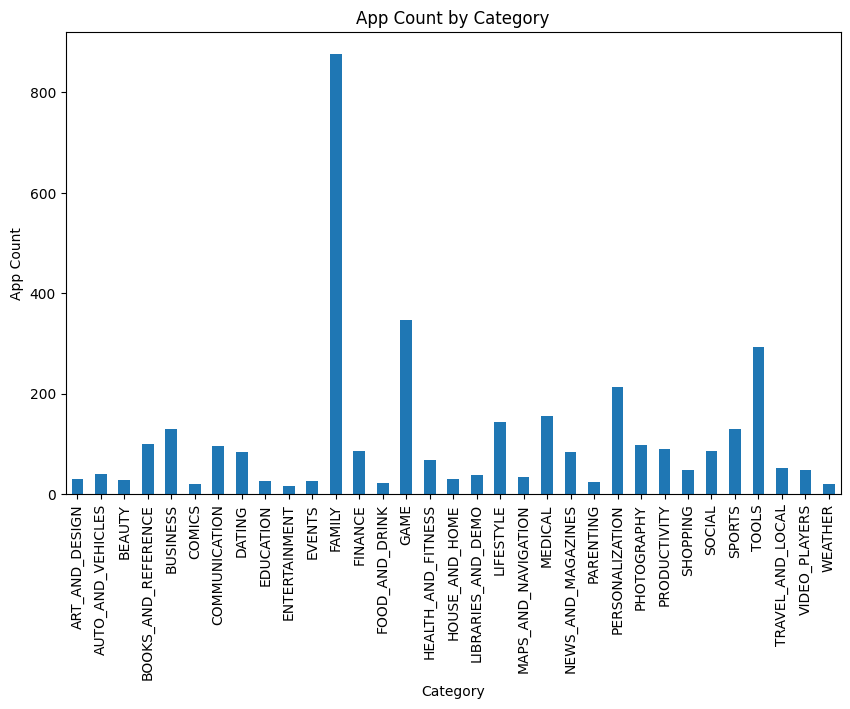

In [57]:
df.groupby('Category')['App'].count().plot(kind='bar')
plt.title('App Count by Category')
plt.xlabel('Category')
plt.ylabel('App Count')
plt.show()

####We can see that there are more applications in the 'Family' category, so we can say:

1. Family-oriented apps are popular, indicating users prefer apps related to family.

2. There's a demand for family apps in the market, and users are downloading them.

3. Family apps have a significant market share.

4. Users want to spend time with their family, and apps are useful for this purpose.

5. Popular family apps also generate significant revenue.

####Considering these insights, we can apply the following strategies:

1. Focus on developing family apps.

2. Improve existing family apps.

3. Run marketing campaigns for family apps.

4. Offer subscription-based models for family apps.

These strategies can help establish our business in the family apps market.



####Bar plot for the Rating and Reviews column

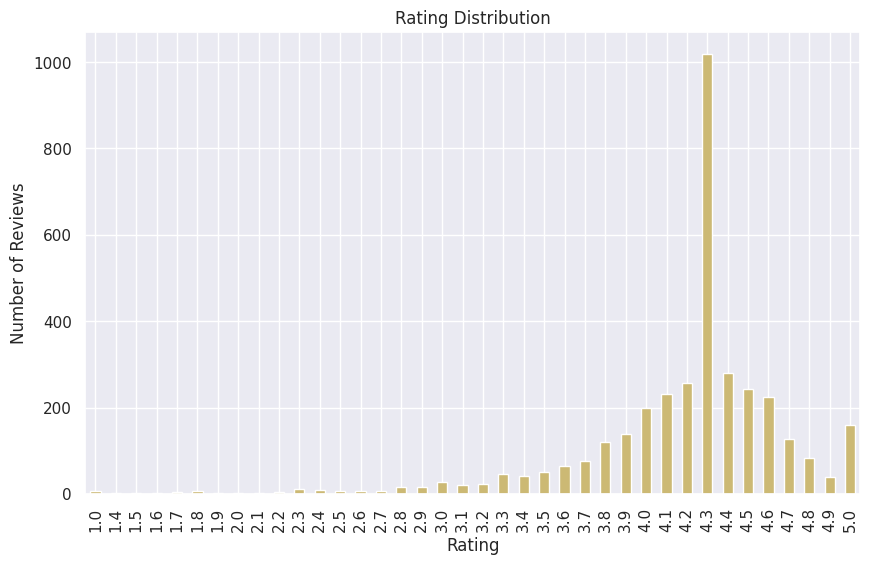

In [73]:
df.groupby('Rating')['Reviews'].count().plot(kind='bar', color='y')
plt.title('Rating Count by Reviews')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Rating Distribution')
plt.show()

####We can see that which got a 4.3 Rating have a most of the Reviews. So we can say that :

1. The app's quality is good: A 4.3 rating indicates a high-quality app.

2. Users are satisfied with the app: Numerous reviews suggest users are happy with the app.

3. The app's popularity is increasing: Positive reviews and ratings boost the app's popularity.

4. The app's credibility is growing: Good ratings and reviews enhance the app's credibility.

5. There's room for improvement: A 4.3 rating suggests opportunities to enhance the app and meet user expectations.

####Considering these insights, we can apply the following strategies:

1. Enhance the app's quality.

2. Listen to user feedback and implement suggestions.

3. Refine the app's marketing strategy.

4. Release regular updates.

5. Improve customer support.

####Bar plot for the type column

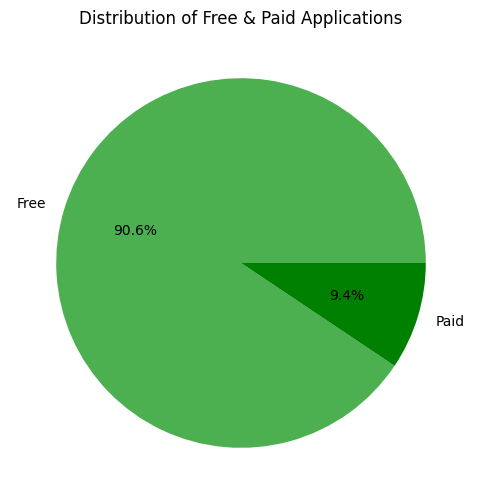

In [52]:
plt.rcParams['figure.figsize'] = (10, 6)
y = df["Type"].value_counts()
mylabels = ["Free", "Paid"]
mycolors = ["#4CAF50", "g"]
plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.1f%%',)
plt.title("Distribution of Free & Paid Applications")
plt.show()

####Identifying the distribution of paid and free apps. Free apps are more than Paid apps.

####Box plot for the rating column



Text(0.5, 1.0, 'Content rating with their counts')

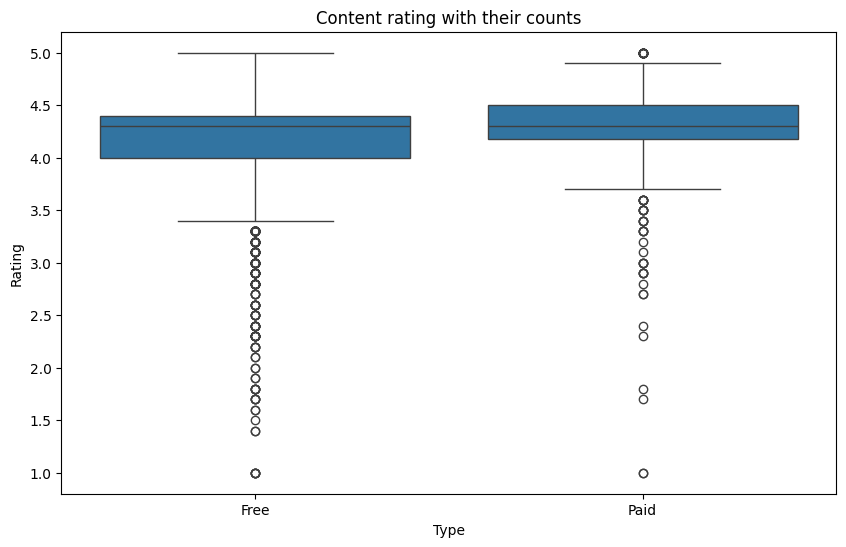

In [53]:
sns.boxplot(x = "Type", y = "Rating", data = df)
plt.title("Content rating with their counts")


####The average rating of paid apps is higher.

####Bar plot for the rating column with the number of the categories

In [94]:
# sns.countplot(y = "Content_Rating", data = df, palette='set2')
# plt.title("Content rating with their counts")

####As you can see, the most apps are in the Everyone category, then comes Teen.

####Box plot for the content rating and rating

####As you can see, the ratings are almost the same for Everyone, Teen, Everyone 10+. The Everyone has more outliers than other categories. Mature 17+ has the lowest average. The rating average of the 18+ category is higher than the others.

####Histogram with the kde for the rating column

In [91]:
# sns.histplot(df["Rating"], kde = True)
# plt.title("Histogram with the kde for the rating column ", size=20,)

####As you can see, the most values are distributed around 4.3.